<p style="text-align: center;"><font size="8"><b>Functions</b></font><br>


Functions are the most general purpose control structure. We have already seen several functions, for example `abs(x)` returns the absolute value of x. Today we will look at creating our own functions.

Let's say that we want to convert a temperature in Fahrenheit to Celcius. In assignment 1 you were given the formula

$$ C = \frac{5}{9}(F - 32).$$

That is, given a temperature in Fahrenheit $F$ we can compute the temperature in Celcius.

In [1]:
F = 88
C = 5/9*(F - 32)
print(C)

31.111111111111114


We could also define a function, say `FtoC` that does the same thing:

In [3]:
def FtoC(F):
    C = 5/9*(F-32)
    return C

FtoC(88)

31.111111111111114

Functions are declared with the keyword `def` (short for define). It is followed by the name of the function, here `FtoC`. Parentheses enclose a series of parameters that are passed in by the caller (F). If a function does not require any parameters there must still be opening and closing parentheses. Finally an indented body contains the code that is executed when the fucntion is called.


    def function_name( parameters) :
        body
    

## Function name

A function name follows the same rules as a variable name. It must only consist of letters, digits and underscores and it cannot start with a digit. It also cannot be a reserved word, for example "`class`".

## Parameters

We are free to choose the names of the parameters. The name we give a parameter is known as a *formal parameter*; it serves as a placeholder for a piece of information from the caller, known as the *actual parameter*. We cannot assume to know the name of the variable name used by the caller. In fact when we call `FtoC(88)`, the actual parameter has a value of 88, but no name. 

In general formal parameter names should be chosen in such a way as to suggest their meaning. That's why we chose `F` in the function above; we could also have chosen `far` or `fahrenheit`. 

Each time our function is called the formal parameter `F` gets assigned the value 

## Body

The body of a function can be any valid Python code. This includes loops and if statements. 

A difference between the body of a function and that of loops and if statements is that any code in the body of a function has **local scope**. This means that variables inside a function do not interact with variables outside the function.

Local scope is good because it means that we do not have to worry about what variable names are used by the caller and the caller doesn't have to worry about what variable names are used in the function. 

An exception to the local scope rule is modules. Modules that are loaded outside the function can still be used inside the function.

In [1]:
C = 12 # we might already have a variable called C

def FtoC(F):
    # here we create a variable C inside the function
    C = 5/9*(F-32)
    return C

print("F=", FtoC(88))
print("C=", C) # notice how the value of C has not changed

F= 31.111111111111114
C= 12


## Return values

Because of local scope the caller cannot access variables defined inside the body of a function. In order to retrieve any information from a function, the function should have a **return statement**. 

When a return statement is called, the function ends. Note that this does not mean that a return statement must be the last statement in a function. Sometimes you may want to have a conditional statement that returns different values to the caller depending on some condition. We'll see examples of this later.

Sometimes you'd like a function to return multiple values. In this case it is customary to return a tuple of values.

## Exercise

Write a function `circleArea()` that takes a radius `r` as a parameter and computes the area of a circle according to formula:
$$ A = \pi r^2.$$

## Exercise

Write a function `isEven()` that takes an integer `n` as a parameter and returns `True` is the number is even and `False` otherwise.

## Exercise

Write a function `sphereInformation()` that takes a radius `r` as a parameter and returns the volume *and* the surface area of a sphere. Use the formulas:
$$ V = \frac{4}{3}\pi r^3, \qquad A = 4\pi r^2.$$

## Flow of Control

When a function is called, whether a built-in function or one that you defined, control passes directly to the body of the function. The body of a function can call other functions. Once a function finishes, control is passed back to whoever called it.



Before the user calls a function, it must be defined. For example, the following code will not work because we are trying to call the function `fib` before it is defined.

In [5]:
print(fib(5))

def fib(N):
    # create list of Fibonacci numbers, append first two numbers
    fib = []
    fib.append(0)
    fib.append(1)

    # loop from 2 to N-1 (giving you N total terms)
    for i in range(2,N):
        # apply reccurance relation
        fib.append(fib[i-1]+fib[i-2])
    print(fib)

NameError: name 'fib' is not defined

## Optional parameters

We've seen some built-in functions that take in optional parameters. For example when plotting a line, we can specify the color and line style if we want, but if we don't the default is just a blue line with no data markers (i.e. '-b'). We can write functions that do this too.

For example consider a countdown function.

In [7]:
def countdown():
    for c in range(10,0,-1):
        print(c)
        
    print("BLASTOFF")
    
countdown()

10
9
8
7
6
5
4
3
2
1
BLASTOFF


Suppose we wanted to let the user select the starting value. Most of the time the user would select ten, but it would be nice to let them choose a different number sometimes. The starting value 10 would then be called the **default parameter**.

In [9]:
def countdown(start = 10):
    for c in range(start,0,-1):
        print(c)
        
    print("BLASTOFF")
    
countdown(5)

5
4
3
2
1
BLASTOFF


In [10]:
def countdown(start = 10):
    for c in range(start,0,-1):
        print(c)
        
    print("BLASTOFF")
    
countdown()

10
9
8
7
6
5
4
3
2
1
BLASTOFF


We can have multiple optional parameters.

In [12]:
def countdown(start = 10, message = "BLASTOFF"):
    for c in range(start,0,-1):
        print(c)
        
    print(message)
    
countdown(5,"YIPPIE!")

5
4
3
2
1
YIPPIE!


The user can specify what parameter to set.

In [13]:
countdown(message="YIPPIE!")

10
9
8
7
6
5
4
3
2
1
YIPPIE!


## Exercise

Write a function `sumOfSquares()` that computes the sum of the square of the first `n` positive integers, i.e. $\sum\limits_{k=1}^n k^2.$

Make `n=5` the default parameter.

## Exercise

Write a function `sumOfPowers()` that computes the sum of the first $n$ positive integers each raised to some power $a$, i.e. $\sum\limits_{k=1}^n k^a.$

Make `n=5` and `a=1` the default parameters.

## Lambda Functions

Functions that are only one line can be defined inline using **lambda functions**. For example the function `FtoC` could be defined in single line by:

In [10]:
FtoC = lambda F: 5/9*(F-32)

FtoC(88)

31.111111111111114

Lambda functions only make sense when the function is actually something that can be defined in a single line. They should not contain loops or conditional statements.


Lambda functions are useful in scientific computing because they allow us to quickly create simple functions to pass in as arguments to other functions. We'll see an example of this shortly. 

## Exercise

Write a lambda function that computes $e^{\sin(x)}$.

# Newton's Method

Last class we saw how to implement a fixed point iteration to solve a nonlinear equation. Today we will look at a better method.

Newton's method is a simple yet highly efficient method for finding the roots (i.e. the zeros) of a function $f(x)$. Starting from an initial point $x_0$, the following sequence of values converges $x^*$, where $f(x^*)=0$:

$$ x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}.$$



That is, given $x_0$ we can find $x_1$, which is closer to $x^*$:

$$ x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}.$$

Once we have $x_1$ we can repeat the process to find $x_2$ and then $x_3$ etc. We repeat this process until:

a) $f(x_k)$ is close to 0, and

b) $|x_{k+1} - x_{k}|$ is small

Unfortunately, there is no guarantee that either of these conditions will ever be satisfied. To aovid an infinite loop we also add am iteration counter. If this counter goes above a certain value the loop exits and an error message is printed.

Let's look at a concrete example. Let's say we want to approximate $\sqrt{2}$. We can do this using Newton's method. 

We let $x^2 = 2$. This means that $f(x) = x^2 - 2 = 0$. 

This gives $f'(x) = 2x$. Let's take our initial guess to be $x_0 = 1$. 

In [17]:
import math

# declare maximum number of iterations and tolerance
IMAX = 20
TOL = 1e-5

# create a list to store the approximations to the root and function values
x = []
f = []

# append intial guess
x.append(1)
f.append(x[0]**2 - 2)

# set iteration counter
icount = 0

# intitialize diff to be some number bigger than TOL
diff = 2*TOL

# loop
while (abs(f[icount]) > TOL or diff > TOL) and icount < IMAX:
    x_next = x[icount] - (x[icount]**2 - 2)/(2*x[icount])
    x.append(x_next)
    f.append(x_next**2 -2)
    
    diff = abs(x_next - x[icount])
    icount = icount + 1

print(x)
print(f)

print("actual error:", abs(math.sqrt(2)-x[-1]))

[1, 1.5, 1.4166666666666667, 1.4142156862745099, 1.4142135623746899]
[-1, 0.25, 0.006944444444444642, 6.007304882871267e-06, 4.510614104447086e-12]
actual error: 1.5947243525715749e-12


Of course we don't need to store all the previous values of $f$ and $x$. Often we are not interested in them. An alternative implementation would look like:

In [8]:
# declare maximum number of iterations and tolerance
IMAX = 20
TOL = 1e-5

# declare initial guess
x0 = 1

# set iteration counter
icount = 0

# intitialize diff to be some number bigger than TOL
diff = 2*TOL

# loop
while (x0**2 + -2 > TOL or diff > TOL) and icount < IMAX:
    x1 = x0 - (x0**2 -2)/(2*x0)
    
    diff = abs(x0 - x1)
    x0 = x1
    icount = icount + 1
    
print("square root of 2 = ", x1)

square root of 2 =  1.4142135623746899


## Implementation With Functions

This works quite well. However, what if instead of approximating $\sqrt{2}$, we wanted to solve $x^3 - 9x + \cos(x) = 0$?

We would have to rewrite the code above and plug in a new $f(x)$ and $f'(x)$. If we write our code using functions, we can keep the code flexible and capable of solving different problems. 

Consider the following function:

In [16]:
def newton_step(x0, f, df):
    return x0 - f(x0)/df(x0)

This is a single iteration. We assume that the inputs `f` and `df` are functions themselves.

We can create a function to do the entire Newton method:

In [16]:
def newtons_method(x0, f, df, tol=1e-5, max_it=20):

    # intitialize iteration counter to 0
    icount = 0

    # intitialize diff to be some number bigger than TOL
    diff = 2*tol

    # loop
    while (f(x0) > TOL or diff > tol) and icount < max_it:
        
        # call newton_step defined earlier
        x1 = newton_step(x0, f, df)
    
        diff = abs(x0 - x1)
        x0 = x1
        icount = icount + 1
        
    return x1

Let's use this code to compute $\sqrt{2}$.

In [32]:
x = newtons_method(1, lambda x: x**2 - 2, lambda x: 2*x)
print(x)

1.4142135623746899


By changing just two inputs we can also now compute the solution to the equation $x^3-9x+\cos(x)=0$. 

In [33]:
x = newtons_method(1, lambda x: x**3 - 9*x + math.cos(x), lambda x: 3*x**2 - 9 - math.sin(x))
print(x)

0.11058269180669812


## Exercise

Modify the code for Newton's method above to return the number of iterations. 

Use this code to solve the equation $x - \cos(x) = 0$. Print out the solution and the number of iterations.

[answer](https://raw.githubusercontent.com/lukasbystricky/ISC-3313/master/lectures/chapter5/code/newtons_method_test.py)

## Exercise 

Complete the function `fixedPoint()` that does a fixed point iteration to solve the equation $x = f(x)$. It should return a solution x as well as the number of iterations `k`. Use it to solve the equation $x = \cos(x)$.

In [ ]:
def fixedPoint(x0, f, max_it = 100, tol = 1e-8):
        
    return (x1, k)

(x, k) = fixedPoint(lambda x: math.cos(x))
print("x =",x)
print("number of iterations:", k)



[answer](https://raw.githubusercontent.com/lukasbystricky/ISC-3313/master/lectures/chapter5/code/fixed_point_test.py)

## Docstrings

Docstrings are a way to provide automatic documentation for a function. Without going into too much detail, after you declare a function you can enclose a series of comments inside triple quotes ("""). Whatever you type here will be printed when you call `help(function)`. 

For example the a docstring for the function `newton_step` might look like:

In [29]:
def newton_step(x0, f, df):
    """
    Take a single Newton step starting from x0
    
    Parameters
    ----------
    x0 : float
        initial approximation
    f  : function
        f(x)
    df : function
        f'(x)
        
    Returns
    -------
    x1 : float
        a better approximation using Newton's method
    
    """
    return x0 - f(x0)/df(x0)

Calling the help function then prints:

In [30]:
help(newton_step)

Help on function newton_step in module __main__:

newton_step(x0, f, df)
    Take a single Newton step starting from x0
    
    Parameters
    ----------
    x0 : float
        initial approximation
    f  : function
        f(x)
    df : function
        f'(x)
        
    Returns
    -------
    x1 : float
        a better approximation using Newton's method



There is no required formatting for the docstring, but it should be readable and provide enough information for a user to understand and use the function. A discussion on some conventions is availiable [here](https://www.python.org/dev/peps/pep-0257/). 

Don't get too caught up in the exact format of your docstring, clarity is the most important part. Its always better to have some sort of docstring than none at all. Find a style you like and stick to that.

# Modules


We've seen how to load in existing Python modules. It is also possible to create our own modules. This is useful if, for example, we want to write a function that will be used in multiple programs. Writing modules also helps keep our script clean and tidy.

In fact, this is extremely easy. All we do is collect a set of functions and put them in a single python file, say `mymodule.py`. This file is automatically a module and can be imported in the standard way. 

Let's look at an example. To calculate compound interest, we have the formula:
$$ A = P \left( 1 + \frac{r}{n}\right)^{nt},$$
where $P$ is the present value of the account, $r$ is the rate compounded $n$ times per year and $A$ is the future value of the account after $t$ years.

This gives $A$ as a function of $P$, $r$, $n$ and $t$. We can rearrange to solve for $P$ and $t$:
$$\begin{align*}
       P = A\left(1 + \frac{r}{n}\right)^{-nt},\\
       t = \frac{\log (A) - \log(P)}{n\log \left(1 + \frac{r}{n}\right)}
\end{align*}$$

We can now write functions to calculate these values:

In [21]:
def future_value(PV, r, n, t):
    """
    Calculates the future value of an account
    
    Parameters
    ----------
    PV : float
        present value
    r : float
        interest rate (decimal form)
    n : int
        compounds per year
    t : int
        number of years
        
    Returns
    -------
    FV : float
        future value of the account after t years
    
    """
    
    return PV*(1 + r/n)**(n*t)

In [22]:
def present_value(FV, r, n, t):
    """
    Calculates the present value of an account
    
    Parameters
    ----------
    FV : float
        future value of the account
    r : float
        interest rate (decimal form)
    n : int
        compounds per year
    t : int
        number of years
        
    Returns
    -------
    FV : float
        future value of the account after t years
    
    """
    
    return FV*(1 + r/n)**(-n*t)

In [ ]:
def years(PV, FV, r, n):    
    """
    Calculates the number of years needed to reach a target value
    
    Parameters
    ----------
    PV : float
        present value of the account
    FV : float
        future value of the account    
    r : float
        interest rate (decimal form)
    n : int
        compounds per year
        
    Returns
    -------
    t : float
        number of years need to reach FV from PV
    
    """
    
    from math import log
    return (log(FV) - log(PV))/(n*log(1 + r/n))

These functions can be collected and put into a module [`finance.py`](https://raw.githubusercontent.com/lukasbystricky/ISC-3313/master/lectures/chapter5/code/finance.py).

If we save this file in the same directory as our interpreter or script, we can call it like a regular module.

In [28]:
import finance

help(finance.future_value)

FV = finance.future_value(100, 0.1, 12, 10)
print("FV:", FV)

Help on function future_value in module finance:

future_value(PV, r, n, t)
    Calculates the future value of an account
    
    Parameters
    ----------
    PV : float
        present value
    r : float
        interest rate (decimal form)
    n : int
        compounds per year
    t : int
        number of years
        
    Returns
    -------
    FV : float
        future value of the account after t years

FV: 270.70414908622433


## Exercise

Create a module `imperialUnitConversions` that contains a set of functions to perform various unit conversions. Create the functions:

* `feet_to_inches` using the conversion 1 foot = 12 inches
* `fathoms_to_feet` using the conversion 1 fathom = 6.08 feet
* `acre_to_sqfeet` using the conversion 1 acre = 43,560 square feet
* `stone_to_pounds` using the conversion 1 stone = 14 pounds

Include doc strings.

# Animations

Making animations is a great way to present data. 

We'll look at how to generate the following animation of an orbit fractal.

![fractal animation](code/orbit_fractal.gif)

Before we start, it's worthwhile pointing out what an animation actually is. 

Animations are just a sequence of still images. If we show a bunch of still images quickly, they begin to blur together and we see a moving picture. Think of a flip book.

This is exactly how we will make animations. We will make a series of still images, in our case they will be plots, and then turn those images into an animation. Specifically we will need to tell Python exactly how to make each frame.

The format of the animation is up to us. I typically prefer gifs because they don't require any special codecs to view and can embedded in a variety of presentations. 

The first step is to generate the data. We saw earlier an example of an orbit fractal.
$$\begin{align*}
    x_i = x_{i-1} -h\sin(y_{i-1} + \tan(3y_{i-1}))\\
    y_i = y_{i-1} -h\sin(x_{i-1} + \tan(3x_{i-1}))
\end{align*}$$

where we took $x_0=0.1$, $y_0=0.05$ and $h=0.1$.

We saw earlier how to generate this data.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# initialize empty list
x = []
y = []

x.append(0.1)
y.append(0.05)

h = 0.1
N = 10000

# apply reccurance relation
for i in range(1,N+1):
    x.append(x[i-1] - h*np.sin(y[i-1] + np.tan(3*y[i-1])))
    y.append(y[i-1] - h*np.sin(x[i-1] + np.tan(3*x[i-1])))

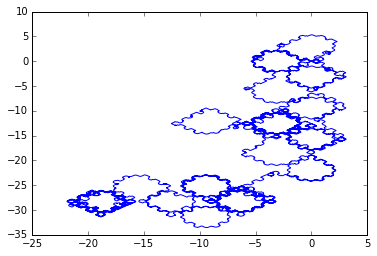

In [3]:
plt.plot(x,y);

This is what the orbit fractal looks like after 10,000 steps. To generate the animation, we will plot the data at a sequence of steps, say every 10 steps. We will then put these plots together to form an animation.

How do we do this? To generate a sequnce of plots we could use a for loop for example. An easier approach is to use the function `FuncAnimation` from the `matplotlib.animation` module. 

`FuncAnimation` takes in a figure, a function that specifies how to update the figure and a list (or array) of frame numbers.

At this point, it might be easier to just look at the code.

In [19]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc

# configure matplotlib animations to display in notebook
rc('animation', html='html5')
# take matplolib out of inline mode for now
%matplotlib

# initialize plot
fig, ax = plt.subplots()
ax.set_xlim((min(x) - 0.1, max(x) + 0.1))
ax.set_ylim((min(y) - 0.1, max(y) + 0.1))

data_line, = ax.plot(x[0],y[0])
ax.set_title("t = %4d" % 0)

# define update function
def update_frame(i):
    data_line.set_data(x[:i], y[:i])
    ax.set_title("t = %4d" % i)


Using matplotlib backend: Qt4Agg


In [16]:
# create animation
anim = FuncAnimation(fig, update_frame, frames = np.arange(0,N,50))
# display it
anim